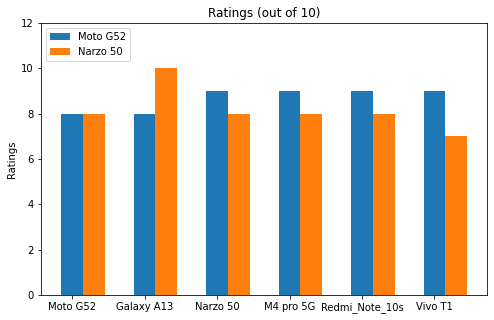

In [ ]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt

# Define phone specifications using dictionaries
phone_specs = {
    'Moto G52': [8, 8, 9, 9, 9, 9],
    'Galaxy A13': [9, 7, 8, 8, 9, 7],
    'Narzo 50': [8, 10, 8, 8, 8, 7],
    'M4 pro 5G': [7, 9, 9, 9, 8, 9],
    'Redmi_Note_10s': [9, 8, 8, 9, 9, 8],
    'Vivo T1': [9, 8, 8, 9, 9, 8]
}

# Function to perform the comparison and display graph
def compare_phones():
    p1 = var_p1.get()
    p2 = var_p2.get()

    if p1 not in phone_specs or p2 not in phone_specs:
        result_label.config(text="Invalid phone selection")
        return

    phones = list(phone_specs.keys())
    y1, y2 = phone_specs[p1], phone_specs[p2]

    l1 = p1
    l2 = p2

    # Create a new window for the graph
    graph_window = tk.Toplevel()
    graph_window.title("Graph of Smartphone Ratings")

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(phones, y1, width=0.30, label=l1)
    ax.bar(np.arange(len(phones)) + 0.30, y2, width=0.30, label=l2)
    ax.set_ylim(0, 12)
    ax.set_title("Ratings (out of 10)")
    ax.legend(loc='upper left')
    ax.set_xlabel("")
    ax.set_ylabel("Ratings")

    # Display the plot in the new window
    canvas = FigureCanvasTkAgg(fig, master=graph_window)
    canvas.draw()
    canvas.get_tk_widget().pack()

    recommendation = f"\nStill confused?\nWe Recommend '{l1}' in this price range"
    result_label.config(text=recommendation)

# Create the main GUI window
root = tk.Tk()
root.title("Smartphone Comparison Tool")

# Create labels, dropdowns, and buttons
var_p1 = tk.StringVar()
var_p2 = tk.StringVar()

label_range = tk.Label(root, text="Select your price range for comparison of desired phones")
label_range.pack()

phone_list = list(phone_specs.keys())
label_p1 = tk.Label(root, text="Select Phone 1:")
dropdown_p1 = ttk.Combobox(root, values=phone_list, textvariable=var_p1)
dropdown_p1.pack()

label_p2 = tk.Label(root, text="Select Phone 2:")
dropdown_p2 = ttk.Combobox(root, values=phone_list, textvariable=var_p2)
dropdown_p2.pack()

#label_p1.grid(row=2, column=0, padx=10)
#dropdown_p1.grid(row=2, column=1, padx=10)

#label_p2.grid(row=2, column=2, padx=10)
#dropdown_p2.grid(row=2, column=3, padx=10)

compare_button = tk.Button(root, text="Compare Phones", command=compare_phones)
compare_button.pack()

result_label = tk.Label(root, text="")
result_label.pack()

# Main loop
root.mainloop()